In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial_data = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")

# Display the data table for preview
trial_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
trial_data_grouped = trial_data.groupby(["Drug", "Timepoint"])
mean_tumor_volume = trial_data_grouped['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame
mean_tumor_volume_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_tumor = trial_data_grouped['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
std_error_tumor_df = pd.DataFrame(std_error_tumor)

# Preview DataFrame
std_error_tumor_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_pivot = mean_tumor_volume_df.pivot_table(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
std_error_tumor_pivot = std_error_tumor_df.pivot_table(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')

mean_tumor_volume_pivot = mean_tumor_volume_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
std_error_tumor_pivot = std_error_tumor_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

# Preview that Reformatting worked
print(std_error_tumor_pivot.head())
mean_tumor_volume_pivot.head()

Drug       Capomulin  Infubinol  Ketapril   Placebo
Timepoint                                          
0           0.000000   0.000000  0.000000  0.000000
5           0.448593   0.235102  0.264819  0.218091
10          0.702684   0.282346  0.357421  0.402064
15          0.838617   0.357705  0.580268  0.614461
20          0.909731   0.476210  0.726484  0.839609


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


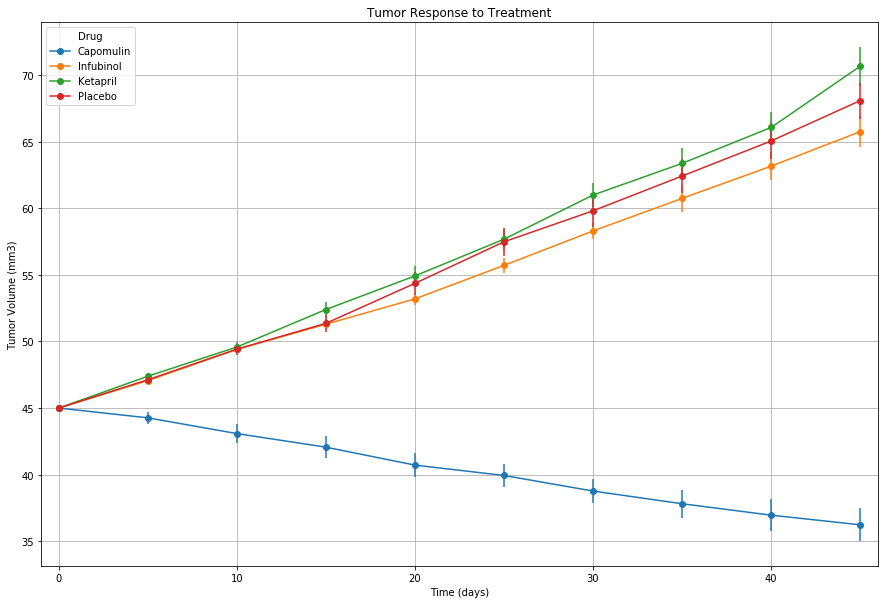

In [5]:
# Generate the Plot (with Error Bars)
mean_tumor_volume_pivot.plot(kind='line', figsize=(15, 10), grid=True, yerr=std_error_tumor_pivot, marker='o')
plt.xlim(-1, 46)
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.savefig('Images/Tumor Reponse to Treatment')

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_site = trial_data_grouped['Metastatic Sites']
mean_meta_site = meta_site.mean()

# Convert to DataFrame
mean_meta_site_df = pd.DataFrame(mean_meta_site)

# Preview DataFrame
mean_meta_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_meta_site = meta_site.sem()

# Convert to DataFrame
std_meta_site_df = pd.DataFrame(std_meta_site)
# Preview DataFrame
std_meta_site_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_meta_site_pivot = mean_meta_site_df.pivot_table(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
std_meta_site_pivot = std_meta_site_df.pivot_table(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')

mean_meta_site_pivot = mean_meta_site_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
std_meta_site_pivot = std_meta_site_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

# Preview that Reformatting worked
print(mean_meta_site_pivot.head())
std_meta_site_pivot.head()

Drug       Capomulin  Infubinol  Ketapril   Placebo
Timepoint                                          
0           0.000000   0.000000  0.000000  0.000000
5           0.160000   0.280000  0.304348  0.375000
10          0.320000   0.666667  0.590909  0.833333
15          0.375000   0.904762  0.842105  1.250000
20          0.652174   1.050000  1.210526  1.526316


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


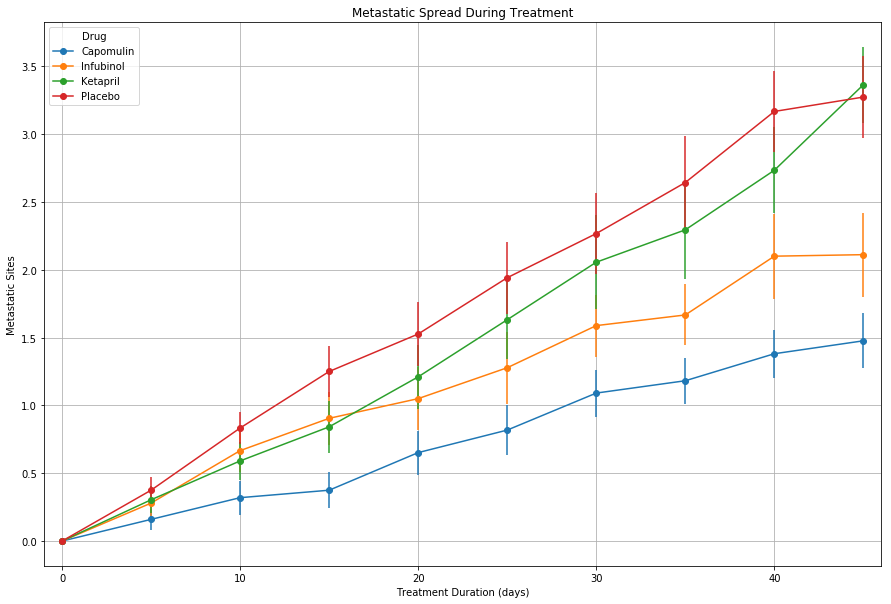

In [10]:
# Generate the Plot (with Error Bars)
mean_meta_site_pivot.plot(kind='line', figsize=(15, 10), grid=True, yerr=std_meta_site_pivot, marker='o')
plt.xlim(-1, 46)
plt.xlabel('Treatment Duration (days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')

# Save the Figure
plt.savefig('Images/Metastatic Spread During Treatment')

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = trial_data_grouped['Mouse ID']
mice_count = mice.count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)

# Preview DataFrame
mice_count_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [12]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot = mice_count_df.pivot_table(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')
mice_count_pivot = mice_count_pivot.rename(columns ={'Mouse ID': 'Mouse Count'})

mice_count_pivot = mice_count_pivot[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

# Preview the Data Frame
mice_count_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


Drug       Capomulin  Infubinol  Ketapril  Placebo
Timepoint                                         
0              100.0      100.0     100.0    100.0
5              100.0      100.0      92.0     96.0
10             100.0       84.0      88.0     96.0
15              96.0       84.0      76.0     80.0
20              92.0       80.0      76.0     76.0
25              88.0       72.0      76.0     68.0
30              88.0       68.0      72.0     60.0
35              88.0       48.0      68.0     56.0
40              84.0       40.0      60.0     48.0
45              84.0       36.0      44.0     44.0


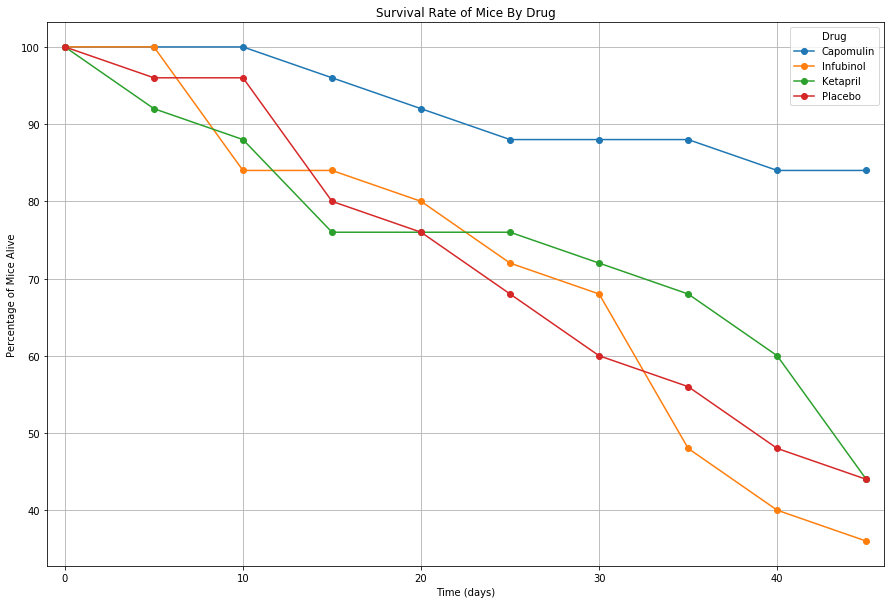

In [13]:
# Generate the Plot (Accounting for percentages)
mice_count_perc = (mice_count_pivot / mice_count_pivot.iloc[0]) * 100

print(mice_count_perc)
mice_count_perc.plot(kind='line', figsize=(15, 10), grid=True, marker='o')
plt.xlim(-1, 46)
plt.xlabel('Time (days)')
plt.ylabel('Percentage of Mice Alive')
plt.title('Survival Rate of Mice By Drug')


# Show the Figure
plt.savefig('Images/Survival Rate of Mice By Drug')

plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
tumor_perc_change = ((mean_tumor_volume_pivot.iloc[9] / mean_tumor_volume_pivot.iloc[0]) - 1) * 100

tumor_perc_change
# Display the data to confirm


Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

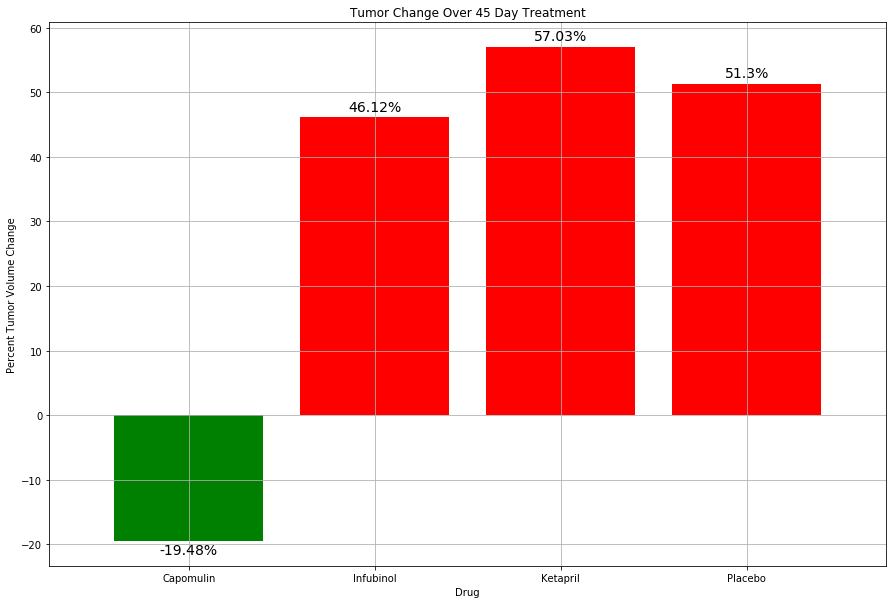

In [15]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs
tumor_perc_change_sorted = tumor_perc_change.sort_values()
tumor_perc_list = list(tumor_perc_change_sorted)


tumor_perc_change_sorted = pd.DataFrame(tumor_perc_change_sorted)
tumor_perc_change_sorted = tumor_perc_change_sorted.rename(columns= {0: 'Percent Change'})
tumor_perc_change_sorted = tumor_perc_change_sorted.round({'Percent Change': 2})

tumor_perc_change_sorted = tumor_perc_change_sorted.loc[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

tumor_positive = tumor_perc_change_sorted.loc[(tumor_perc_change_sorted['Percent Change'] < 0)]
tumor_negative = tumor_perc_change_sorted.loc[(tumor_perc_change_sorted['Percent Change'] >= 0)]
tick_values = [value for value in tumor_perc_change_sorted.index.values]

fig = plt.figure(figsize=(15,10))
plt.bar(tumor_positive.index.values, tumor_positive['Percent Change'], color='g', align='center')
plt.bar(tumor_negative.index.values, tumor_negative['Percent Change'], color='r', align='center')
plt.grid()
# Orient widths. Add labels, tick marks, etc. 
plt.xlabel('Drug')
plt.ylabel('Percent Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')

plt.xlim(-0.75, len(tick_values)-0.25)

# Use functions to label the percentages of changes
for i, x in zip(tumor_positive.index.values, tumor_positive['Percent Change']):
    plt.text(i, x-2, str(x)+'%', size=14, ha='center')

for i, x in zip(tumor_negative.index.values, tumor_negative['Percent Change']):
    plt.text(i, x+1, str(x)+'%', size=14, ha='center')

# Call functions to implement the function calls


# Save the Figure
plt.savefig('Images/Tumor Change Over 45 Day Treatment')

# Show the Figure
plt.show()